# 1. 회귀 모형 - 직접 구현

In [ ]:
# data load
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

print(X_train.shape)
print(X_train[:5])
print(y_train.shape)
print(y_train[:5])

(80, 1)
[[0.17941071]
 [0.15846954]
 [0.52324766]
 [1.3799201 ]
 [0.33225315]]
(80,)
[ 24.64812471 -19.07314539  37.35891532 117.99658351   9.55981705]


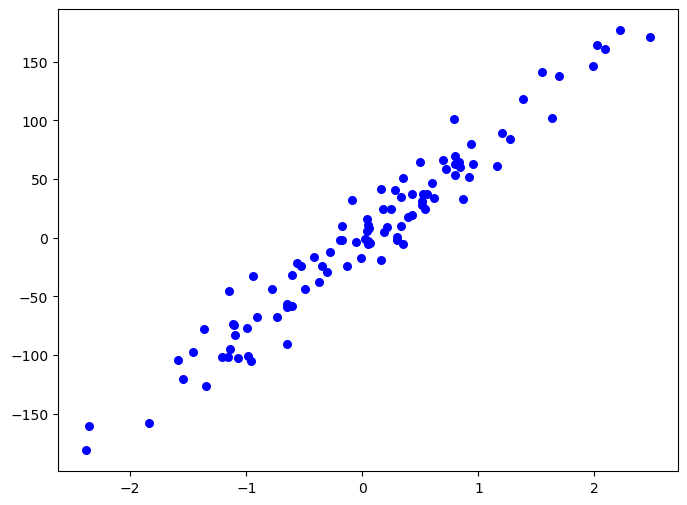

In [2]:
# 시각화
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 6))
plt.scatter(X, y, color = 'b', marker = 'o', s = 30)
plt.show()

In [3]:
# regression 구현
import numpy as np

class LinearRegression:
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    # Training
    def fit(self, X, y):
        # initialize parameters
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        """
        모든 가중치 0으로 초기화
        e.g. [0.]
        """

        self.bias = 0
        """
        편향 0으로 초기화 / scalar
        """        

        # Gradient Descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            """
            y = Xw + b
            y : n x 1
            X : n x p
            w : p x 1
            b : scalar
            """

            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            """
            dw = (1/n) * X^T * (y_pred - y_true)
            db = (1/n) * sum(y_pred - y_true)
            """

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias

        return y_predicted

In [4]:
# regression
regressor = LinearRegression(lr = 0.01)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [5]:
# MSE
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

mse_value = mse(y_test, y_pred)
print(mse_value)

305.7719958301902


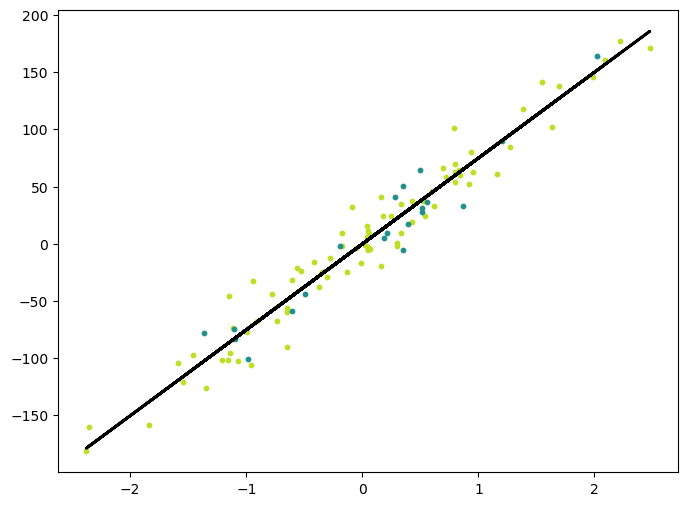

In [6]:
# 시각화
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')

fig = plt.figure(figsize = (8, 6))
m1 = plt.scatter(X_train, y_train, color = cmap(0.9), s = 10)
m2 = plt.scatter(X_test, y_test, color = cmap(0.5), s = 10)
plt.plot(X, y_pred_line, color = 'black', linewidth = 2, label = 'Prediction')
plt.show()

# 2. 회귀 모형 - 직접 구현

In [7]:
import pandas as pd

columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
                 sep = '\t', usecols = columns)

# 전처리
df['Central Air'] = df['Central Air'].map({'Y': 1, 'N': 0})

# NA handling
df.isna().sum()
df = df.dropna(axis = 0)

X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

print(X.shape)
print(X)
print(y.shape)
print(y)

(2929, 1)
[[1656]
 [ 896]
 [1329]
 ...
 [ 970]
 [1389]
 [2000]]
(2929,)
[215000 105000 172000 ... 132000 170000 188000]


In [8]:
# Gradient Descent로 regression coefficient 구하기
import numpy as np

class LinearRegressionGD:
    def __init__(self, lr = 0.01, n_iter = 50, random_state = 1):
        self.lr = lr
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        # random seed 생성
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
        
        # Gradient Descent
        for i in range(self.n_iter):
            y_predicted = self.net_input(X)
            errors = (y - y_predicted)

            self.w_ += self.lr * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.lr * 2.0 * errors.mean()

            loss = (errors**2).mean()
            self.losses_.append(loss)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return self.net_input(X)

In [9]:
# scaling
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaling = X_scaler.fit_transform(X)
y_scaling = y_scaler.fit_transform(y[:, np.newaxis]).flatten()
"""
데이터가 2차원 배열로 저장되어 있어야 하기 때문에,
np.newaxis로 새로운 차원을 추가 후 표준화를 진행,
그리고 다시 flatten을 통해 1차원 배열로 되돌림.
"""

print(X_scaling)
print(y_scaling)

[[ 0.30887979]
 [-1.19492198]
 [-0.33815071]
 ...
 [-1.04849917]
 [-0.21942951]
 [ 0.98954796]]
[ 0.42783926 -0.94949293 -0.11057241 ... -0.61142048 -0.13561481
  0.08976682]


In [10]:
# Training
regressor = LinearRegressionGD(lr = 0.1)
regressor.fit(X_scaling, y_scaling)

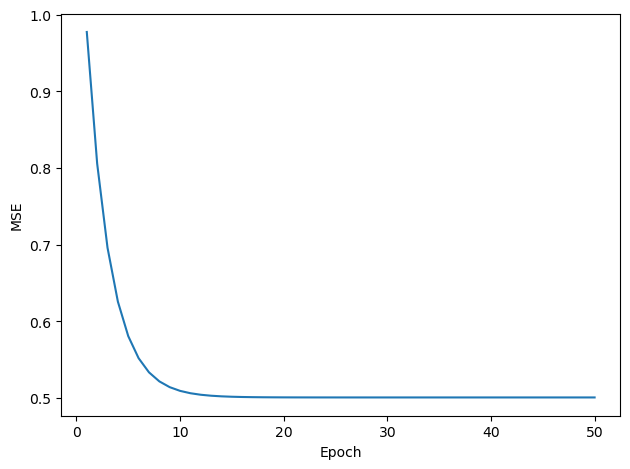

In [11]:
# Cost function
import matplotlib.pyplot as plt

plt.plot(range(1, regressor.n_iter+1), regressor.losses_)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()

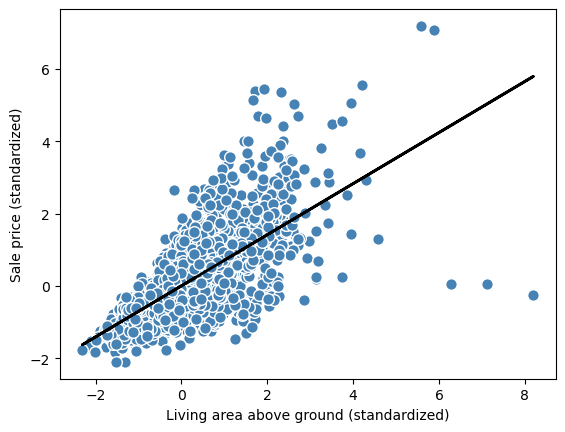

In [12]:
# 시각화
def lin_reg_plot(X, y, model):
    plt.scatter(X, y, c = 'steelblue', edgecolor = 'white', s = 70)
    plt.plot(X, model.predict(X), color = 'black', lw = 2)

    return

lin_reg_plot(X_scaling, y_scaling, regressor)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')
plt.show()

In [13]:
# 예측된 출력 값을 원래 스케일로 복원하기
# 2500일 때 주택 가격 예측
feature_std = X_scaler.transform(np.array([[2500]]))

# 예측측
target_std = regressor.predict(feature_std)

# 스케일 복원
target_reverted = y_scaler.inverse_transform(target_std.reshape(-1, 1))

print(f'판매가격: ${target_reverted.flatten()[0]:.2f}')

판매가격: $292507.07


In [14]:
print(f'기울기: {regressor.w_[0]:.3f}')
print(f'절편: {regressor.b_[0]:.3f}')


기울기: 0.707
절편: -0.000


# 3. 회귀 모형 - sklearn

In [15]:
import pandas as pd

columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
                 sep = '\t', usecols = columns)

# 전처리
df['Central Air'] = df['Central Air'].map({'Y': 1, 'N': 0})

# NA handling
df.isna().sum()
df = df.dropna(axis = 0)

X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

print(X.shape)
print(X)
print(y.shape)
print(y)

(2929, 1)
[[1656]
 [ 896]
 [1329]
 ...
 [ 970]
 [1389]
 [2000]]
(2929,)
[215000 105000 172000 ... 132000 170000 188000]


In [16]:
from sklearn.linear_model import LinearRegression as LR

LR_model = LR()
LR_model.fit(X, y)

y_pred = LR_model.predict(X)
print(f'기울기: {LR_model.coef_[0]:.3f}')
print(f'절편: {LR_model.intercept_:.3f}')

기울기: 111.666
절편: 13342.979


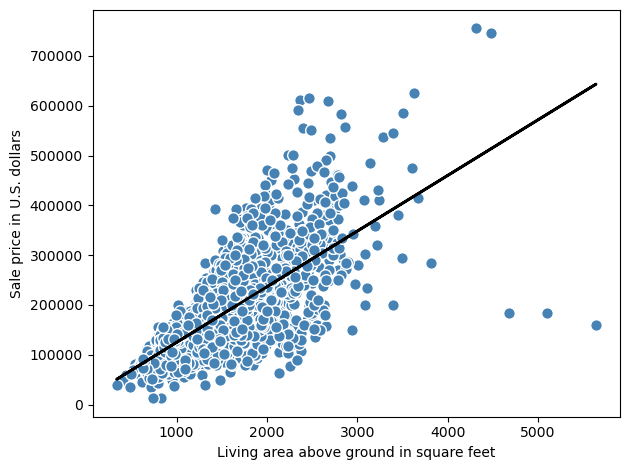

In [17]:
# 시각화
import matplotlib.pyplot as plt

lin_reg_plot(X, y, LR_model)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.tight_layout()
plt.show()

In [18]:
# Normal equation(정규 방정식)으로 회귀계수 직접 계산하기
# w = (X'X)^{-1}X'y

Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(Xb.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print(f'기울기: {w[1]:.3f}')
print(f'절편: {w[0]:.3f}')

기울기: 111.666
절편: 13342.979


In [19]:
# QR decomposition으로 회귀계수 직접 계산하기
# w = (X'X)^{-1}X'y = X^{-1}y = (QR)^{-1}y = R^{-1}Q^{-1}y = R^{-1}Q'y

Xb = np.hstack((np.ones((X.shape[0], 1)), X))
Q, R = np.linalg.qr(Xb)
w = np.dot(np.linalg.inv(R), np.dot(Q.T, y))

print(f'기울기: {w[1]:.3f}')
print(f'절편: {w[0]:.3f}')

기울기: 111.666
절편: 13342.979
